### Introduction

Welcome to the data analysis workshop. Today we will be exploring two datasets: kaggle survey data, and titanic survival data. First, let's import the necessary libraries and load in the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mc_responses = pd.read_csv('inputs/multipleChoiceResponses.csv', encoding='ISO-8859-1')
pd.options.display.max_columns = None
mc_responses.head()

c:\users\oliver spohngellert\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

In [3]:
for column in mc_responses.columns:
    print(column)

GenderSelect
Country
Age
EmploymentStatus
StudentStatus
LearningDataScience
CodeWriter
CareerSwitcher
CurrentJobTitleSelect
TitleFit
CurrentEmployerType
MLToolNextYearSelect
MLMethodNextYearSelect
LanguageRecommendationSelect
PublicDatasetsSelect
LearningPlatformSelect
LearningPlatformUsefulnessArxiv
LearningPlatformUsefulnessBlogs
LearningPlatformUsefulnessCollege
LearningPlatformUsefulnessCompany
LearningPlatformUsefulnessConferences
LearningPlatformUsefulnessFriends
LearningPlatformUsefulnessKaggle
LearningPlatformUsefulnessNewsletters
LearningPlatformUsefulnessCommunities
LearningPlatformUsefulnessDocumentation
LearningPlatformUsefulnessCourses
LearningPlatformUsefulnessProjects
LearningPlatformUsefulnessPodcasts
LearningPlatformUsefulnessSO
LearningPlatformUsefulnessTextbook
LearningPlatformUsefulnessTradeBook
LearningPlatformUsefulnessTutoring
LearningPlatformUsefulnessYouTube
BlogsPodcastsNewslettersSelect
LearningDataScienceTime
JobSkillImportanceBigData
JobSkillImportanceDegre

## Part 1: Working with categorical data

Now let's try to take a look into the relationship between two variables. For this exercise, we will select LanguageRecommendationSelect and EmploymentStatus. Maybe Python developers are more likely to be employed in the current marketplace, or are mor likely to be free lancers. Let's find out! The first step is to find the unique values of each variable.

In [4]:
mc_responses.LanguageRecommendationSelect.unique()

array(['F#', 'Python', 'R', 'SQL', nan, 'Java', 'Matlab', 'C/C++/C#',
       'SAS', 'Stata', 'Other', 'Julia', 'Scala', 'Haskell'], dtype=object)

In [5]:
mc_responses.EmploymentStatus.unique()

array(['Employed full-time', 'Not employed, but looking for work',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, and not looking for work', 'Employed part-time',
       'Retired', 'I prefer not to say'], dtype=object)

In [6]:
mc_responseds_no_na_em_lang = mc_responses[(~ pd.isnull(mc_responses.EmploymentStatus)) & (~ pd.isnull(mc_responses.LanguageRecommendationSelect))]
print(len(mc_responseds_no_na_em_lang))
print(len(mc_responses))

10998
16716


Great, now that we know the unique values, and have all the rows where neither value is NA, we can start analyzing. Let's start by looking at distributions.

In [7]:
for lang in mc_responseds_no_na_em_lang.LanguageRecommendationSelect.unique():
    if pd.isnull(lang):
        continue
    print('{} Percentage: {}%'.format(lang, round(sum(mc_responseds_no_na_em_lang.LanguageRecommendationSelect == lang) / len(mc_responseds_no_na_em_lang) * 100, 2)))

F# Percentage: 0.04%
Python Percentage: 63.11%
R Percentage: 24.03%
SQL Percentage: 3.5%
Java Percentage: 1.25%
Matlab Percentage: 2.16%
C/C++/C# Percentage: 2.79%
SAS Percentage: 0.8%
Stata Percentage: 0.25%
Other Percentage: 0.77%
Julia Percentage: 0.27%
Scala Percentage: 0.85%
Haskell Percentage: 0.15%


As we can see, Python and R take up the majority of the distribution, at about 87%. Due to this, we will focus our analysis on these two.

Employed full-time Percentage: 61.94%
Employed part-time Percentage: 4.67%
I prefer not to say Percentage: 2.54%
Independent contractor, freelancer, or self-employed Percentage: 7.42%
Not employed, and not looking for work Percentage: 6.77%
Not employed, but looking for work Percentage: 16.02%
Retired Percentage: 0.64%


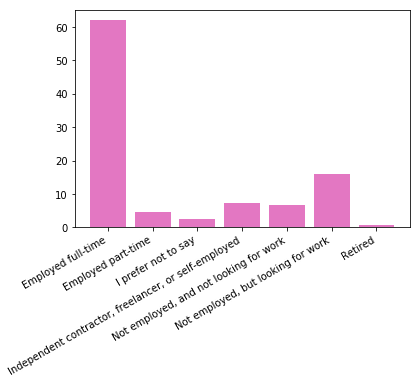

In [8]:
X = []
Y = []
for status in sorted(mc_responseds_no_na_em_lang.EmploymentStatus.unique()):
    if pd.isnull(status):
        continue
    percentage = round(sum(mc_responseds_no_na_em_lang.EmploymentStatus == status) / len(mc_responseds_no_na_em_lang) * 100, 2)
    Y.append(percentage)
    X.append(status)
    print('{} Percentage: {}%'.format(status, percentage))
    plt.bar(X, Y)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
plt.show()

Most of the categories have a decent number of respondents. The only two that do not, are not too relevant to our analysis. Now let's look at the distributions of employment for our two key languages, Python and R.

Employed full-time Percentage: 60.93%
Employed part-time Percentage: 4.77%
I prefer not to say Percentage: 2.52%
Independent contractor, freelancer, or self-employed Percentage: 7.22%
Not employed, and not looking for work Percentage: 7.68%
Not employed, but looking for work Percentage: 16.41%
Retired Percentage: 0.48%


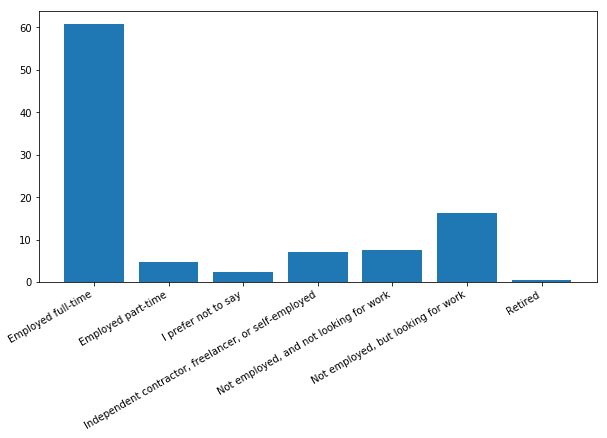

In [9]:
mc_responses_py = mc_responseds_no_na_em_lang[mc_responseds_no_na_em_lang.LanguageRecommendationSelect == 'Python']
X = []
Y = []
for status in sorted(mc_responses_py.EmploymentStatus.unique()):
    if pd.isnull(status):
        continue
    percentage = round(sum(mc_responses_py.EmploymentStatus == status) / len(mc_responses_py) * 100, 2)
    Y.append(percentage)
    X.append(status)
    print('{} Percentage: {}%'.format(status, percentage))
    
plt.bar(X, Y)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
plt.show()

The distribution for Python developers looks very similar to the general distribution. Let's try this again for R devs.

Employed full-time Percentage: 65.57%
Employed part-time Percentage: 4.31%
I prefer not to say Percentage: 2.16%
Independent contractor, freelancer, or self-employed Percentage: 7.68%
Not employed, and not looking for work Percentage: 4.81%
Not employed, but looking for work Percentage: 14.87%
Retired Percentage: 0.61%


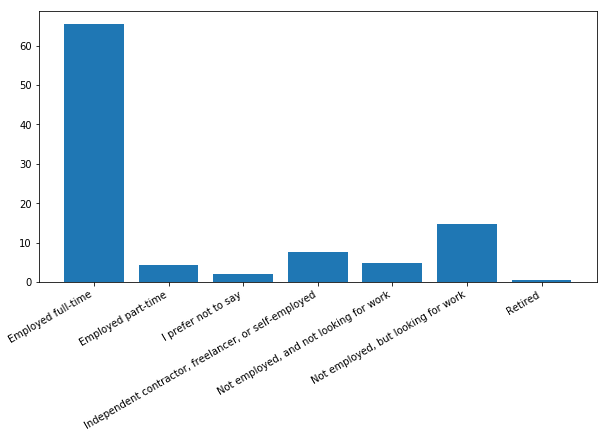

In [10]:
mc_responses_R = mc_responseds_no_na_em_lang[mc_responseds_no_na_em_lang.LanguageRecommendationSelect == 'R']
X = []
Y = []
for status in sorted(mc_responses_R.EmploymentStatus.unique()):
    if pd.isnull(status):
        continue
    percentage = round(sum(mc_responses_R.EmploymentStatus == status) / len(mc_responses_R) * 100, 2)
    Y.append(percentage)
    X.append(status)
    print('{} Percentage: {}%'.format(status, percentage))
    
plt.bar(X, Y)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
plt.show()

It seems R developers are more likely to be employed full time, and less likely to be not employed and not looking for work. This is somewhat significant, as it signifies that R developers are slightly more active compared to Python developers. Let's look at some of the smaller languages to see if there are any fun outliers.

Employed full-time Percentage: 52.52%
Employed part-time Percentage: 5.88%
I prefer not to say Percentage: 4.2%
Independent contractor, freelancer, or self-employed Percentage: 6.3%
Not employed, and not looking for work Percentage: 7.98%
Not employed, but looking for work Percentage: 21.43%
Retired Percentage: 1.68%


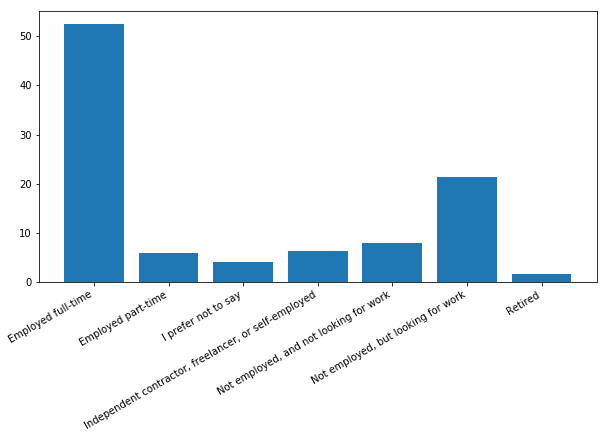

In [11]:
mc_responses_ml = mc_responseds_no_na_em_lang[mc_responseds_no_na_em_lang.LanguageRecommendationSelect == 'Matlab'] 
X = []
Y = []
for status in sorted(mc_responses_ml.EmploymentStatus.unique()):
    if pd.isnull(status):
        continue
    percentage = round(sum(mc_responses_ml.EmploymentStatus == status) / len(mc_responses_ml) * 100, 2)
    Y.append(percentage)
    X.append(status)
    print('{} Percentage: {}%'.format(status, percentage))
    
plt.bar(X, Y)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
plt.show()

Looks like matlab developers are out of work.

Employed full-time Percentage: 82.98%
Employed part-time Percentage: 2.13%
I prefer not to say Percentage: 3.19%
Independent contractor, freelancer, or self-employed Percentage: 5.32%
Not employed, and not looking for work Percentage: 1.06%
Not employed, but looking for work Percentage: 5.32%


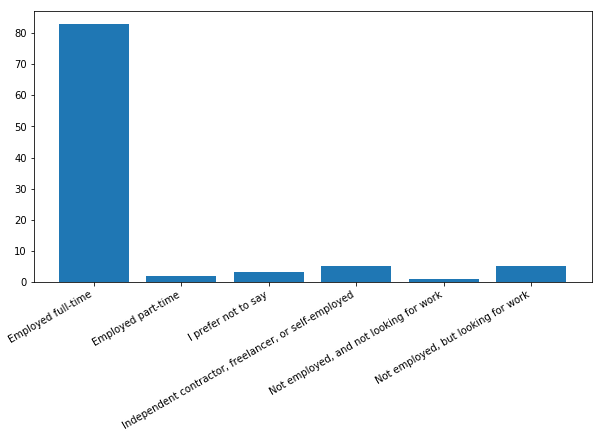

In [12]:
mc_responses_scl = mc_responseds_no_na_em_lang[mc_responseds_no_na_em_lang.LanguageRecommendationSelect == 'Scala'] 
X = []
Y = []
for status in sorted(mc_responses_scl.EmploymentStatus.unique()):
    if pd.isnull(status):
        continue
    percentage = round(sum(mc_responses_scl.EmploymentStatus == status) / len(mc_responses_scl) * 100, 2)
    Y.append(percentage)
    X.append(status)
    print('{} Percentage: {}%'.format(status, percentage))
    
plt.bar(X, Y)
plt.rcParams["figure.figsize"] = (10,5)
plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
plt.show()

Though the sample size is small, the Scala community is very heavily employed.

### Exercise 1

Do a similar type of analysis for two other variables in the data set. Below are some ideas

* GenderSelect and EmployerSize/EmploymentStatus
* CurrentJobTitleSelect and FormalEducation


## Part 2: Working with continuous data.

We will now take a look at the correlation between Age and compensation. For the purposes of this exercise, we will only use salaries reported in USD, but this analysis translates to using any currency, as long as the conversion is applied.

In [13]:
mc_responses_USD = mc_responses[(mc_responses.CompensationCurrency == 'USD') & (~pd.isnull(mc_responses.Age))]
len(mc_responses_USD)

1564

One thing we can do is try putting the curencies in bins, in order to see the distribution of the data. First, let's abstract a funciton we've been using a lot.

In [14]:
def getPercentage(col, func):
    return round(sum(func(col)) / len(col) * 100, 2)

In [15]:
X = []
Y = []
X.append('< 18')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: col < 18))

TypeError: '<' not supported between instances of 'str' and 'int'

Oh no! It looks like the currency was read in as a string, not an int. Let's look at the unique values for salary

In [16]:
mc_responses_USD.CompensationAmount.unique()

array(['250,000', '20000', '100000', '133000', '80000', '15000', '215000',
       '83500', '115000', '135000', '75000', '10000', '85,000', '65,000',
       '130,000', '55000', '85000', '92,000', '79000', '305000', '90,000',
       '140000', '160000', '25000', '25,000', '180000', '90000', '39,000',
       '155000', '170,075', '30000', '36,000', '49000', '18000', nan,
       '40,000', '50000', '470000', '17200', '150,000', '130000', '60000',
       '178000', '150000', '107000', '40000', '67500', '58000', '105000',
       '200000', '125000', '70000', '78000', '65000', '77,000', '35000',
       '121000', '59000', '94000', '50,000', '165000', '226000', '95000',
       '117000', '47000', '255000', '92000', '190,000', '77000', '220000',
       '79,000', '175000', '38000', '120,000', '134000', '320000',
       '110000', '120000', '103000', '71,500', '210000', '72000', '67000',
       '45000', '27000', '1000000', '95,000', '115500', '172000',
       '140,000', '1000', '49750', '230000', '160,00

It seems some people put commas in their responses. Further, some of this seems to be junk data ('-', '1'), or on a monthly basis and not weekly. Let's do some work to clean this up.

In [17]:
def getUSD(val):
    try:
        val.replace(',', '')
        to_ret = int(val)
        if to_ret < 10000:
            return np.NaN
        else:
            return to_ret
    except:
        return np.NaN
mc_responses_USD.CompensationAmount = mc_responses_USD.CompensationAmount.map(getUSD)
mc_responses_USD = mc_responses_USD[~(pd.isnull(mc_responses_USD.CompensationAmount))]


c:\users\oliver spohngellert\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [18]:
print(len(mc_responses_USD))
mc_responses_USD.head()

1237


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,JobSkillImportancePython,JobSkillImportanceR,JobSkillImportanceSQL,JobSkillImportanceKaggleRanking,JobSkillImportanceMOOC,JobSkillImportanceVisualizations,JobSkillImportanceOtherSelect1,JobSkillImportanceOtherSelect2,JobSkillImportanceOtherSelect3,CoursePlatformSelect,HardwarePersonalProjectsSelect,TimeSpentStudying,ProveKnowledgeSelect,DataScienceIdentitySelect,FormalEducation,MajorSelect,Tenure,PastJobTitlesSelect,FirstTrainingSelect,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,MLSkillsSelect,MLTechniquesSelect,ParentsEducation,EmployerIndustry,EmployerSize,EmployerSizeChange,EmployerMLTime,EmployerSearchMethod,UniversityImportance,JobFunctionSelect,WorkHardwareSelect,WorkDataTypeSelect,WorkProductionFrequency,WorkDatasetSize,WorkAlgorithmsSelect,WorkToolsSelect,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,WorkToolsFrequencyIBMSPSSModeler,WorkToolsFrequencyIBMSPSSStatistics,WorkToolsFrequencyIBMWatson,WorkToolsFrequencyImpala,WorkToolsFrequencyJava,WorkToolsFrequencyJulia,WorkToolsFrequencyJupyter,WorkToolsFrequencyKNIMECommercial,WorkToolsFrequencyKNIMEFree,WorkToolsFrequencyMathematica,WorkToolsFrequencyMATLAB,WorkToolsFrequencyAzure,WorkToolsFrequencyExcel,WorkToolsFrequencyMicrosoftRServer,WorkToolsFrequencyMicrosoftSQL,WorkToolsFrequencyMinitab,WorkToolsFrequencyNoSQL,WorkToolsFrequencyOracle,WorkToolsFrequencyOrange,WorkToolsFrequencyPerl,WorkToolsFrequencyPython,WorkToolsFrequencyQlik,WorkToolsFrequencyR,WorkToolsFrequencyRapidMinerCommercial,WorkToolsFrequencyRapidMinerFree,WorkToolsFrequencySalfrod,WorkToolsFrequencySAPBusinessObjects,WorkToolsFrequencySASBase,WorkToolsFrequencySASEnterprise,WorkToolsFrequencySASJMP,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2,WorkFrequencySelect3,WorkMethodsSelect,WorkMethodsFrequencyA/B,WorkMethodsFrequencyAssociationRules,WorkMethodsFrequencyBayesian,WorkMethodsFrequencyCNNs,WorkMethodsFrequencyCollaborativeFiltering,WorkMethodsFrequencyCross-Validation,WorkMethodsFrequencyDataVisualization,WorkMethodsFrequencyDecisionTrees,WorkMethodsFrequencyEnsembleMethods,WorkMethodsFrequencyEvolutionaryApproaches,WorkMethodsFrequencyGANs,WorkMethodsFrequencyGBM,WorkMethodsFrequencyHMMs,WorkMethodsFrequencyKNN,WorkMethodsFrequencyLiftAnalysis,WorkMethodsFrequencyLogisticRegression,WorkMethodsFrequencyMLN,WorkMethodsFrequencyNaiveBayes,WorkMethodsFrequencyNLP,WorkMethodsFrequencyNeuralNetworks,WorkMethodsFrequencyPCA,WorkMethodsFrequencyPrescripti

Looks much better. Let's try the binning again.

Text(0,0.5,'% of total')

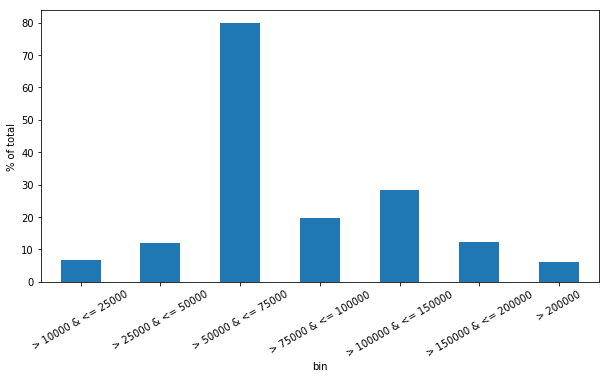

In [19]:
X = []
Y = []
X.append('> 10000 & <= 25000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 10000) & (col <= 25000)))
X.append('> 25000 & <= 50000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 25000) & (col <= 50000)))
X.append('> 50000 & <= 75000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 50000) & (col <= 750000)))
X.append('> 75000 & <= 100000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 75000) & (col <= 100000)))
X.append('> 100000 & <= 150000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 100000) & (col <= 150000)))
X.append('> 150000 & <= 200000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 150000) & (col <= 200000)))
X.append('> 200000')
Y.append(getPercentage(mc_responses_USD.CompensationAmount, lambda col: (col > 200000)))

# plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
test = pd.DataFrame(list(zip(X, Y)))
barplot = test.plot.bar(x=0, rot=30, legend=False)
barplot.set_xlabel('bin')
barplot.set_ylabel('% of total')

Note: The reason we used a dataframe to plot this one, is because matplotlib unfortunately automatically sorts labels given to plot. We do not want this in this case, so we used this as a workaround. The data seems fairly normally distributed, centered around the 75k to 100k range. Let's do the same for ages.

Text(0,0.5,'% of total')

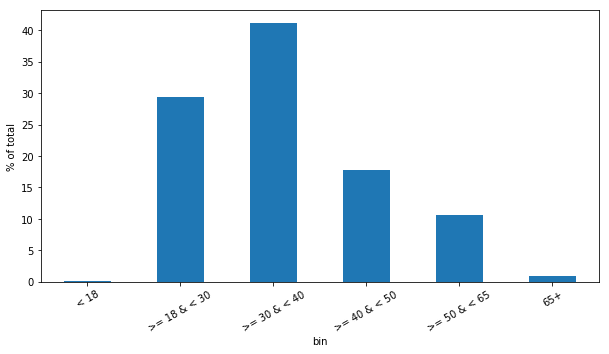

In [20]:
X = []
Y = []
X.append('< 18')
Y.append(getPercentage(mc_responses_USD.Age, lambda col: (col < 18)))
X.append('>= 18 & < 30')
Y.append(getPercentage(mc_responses_USD.Age, lambda col: (col >= 18) & (col < 30)))
X.append('>= 30 & < 40')
Y.append(getPercentage(mc_responses_USD.Age, lambda col: (col >= 30) & (col < 40)))
X.append('>= 40 & < 50')
Y.append(getPercentage(mc_responses_USD.Age, lambda col: (col >= 40) & (col < 50)))
X.append('>= 50 & < 65')
Y.append(getPercentage(mc_responses_USD.Age, lambda col: (col >= 50) & (col < 65)))
X.append('65+')
Y.append(getPercentage(mc_responses_USD.Age, lambda col: (col >= 65)))
# plt.xticks([i for i in range(len(X))], X, rotation=30, ha='right')
df = pd.DataFrame(list(zip(X, Y)))
barplot = df.plot.bar(x=0, rot=30, legend=False)
barplot.set_xlabel('bin')
barplot.set_ylabel('% of total')

This data seems to be much more concentrated towards the ages of 18 - 40. Nevertheless, the distribution looks normal enough. Now let's create a scatter plot of ages and salaries.

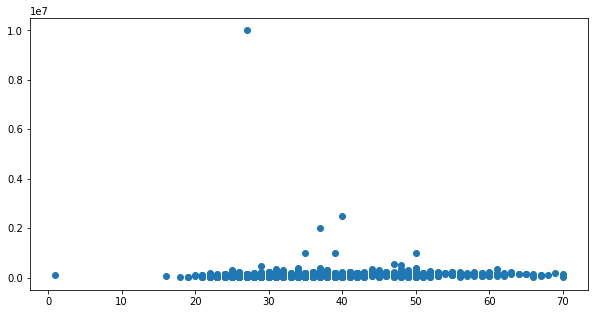

In [21]:
plt.scatter(mc_responses_USD.Age, mc_responses_USD.CompensationAmount)

There's an outlier that is messing up our vizualization! Let's get rid of it.

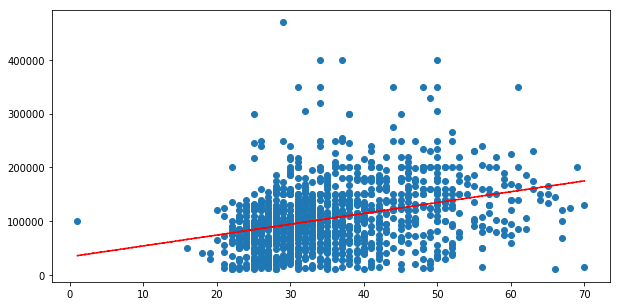

In [31]:
mc_responses_USD = mc_responses_USD[mc_responses_USD.CompensationAmount < 500000]
x = mc_responses_USD.Age
y = mc_responses_USD.CompensationAmount
plt.scatter(x, y)
# Add trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

Unfortunately this plot doesn't tell us much, though it vaguely looks like salary goes up with age. Let's look at the correlation factor.

In [23]:
df2 = pd.DataFrame(list(zip(mc_responses_USD.Age, mc_responses_USD.CompensationAmount)), columns=['Age', 'Compensation'])
df2.corr()

,Age,Compensation
Age,1.000000,0.321587
Compensation,0.321587,1.000000


This isn't an insignificant correlation! If we were creating a machine learning algorithm to predict the compensation of a respondent, Age would definitely be included as a feature.

### Exercise 2

Try analyzing the correlation between a continuous and a categorical variable. Here are some features you could use:

* Continuous
    * CompensationAmount
    * JobSatisfaction
    * Age
* Categorical
    * EmployerSize
    * ParentsEducation
    * Tenure
    * MajorSelect

## Part 3: Working with missing data

We have seen what types of analysis we can do when we have all the data, or filter out missing data. But what if we need missing data? What strategies can we use to impute these missing values. To learn this, we will be using the titanic dataset from Kaggle.

In [24]:
titanic = pd.read_csv("inputs/train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using pandas' describe function can help you get a quick idea of the shape of the numerical data. One thing that immediately jumps out: We are missing the age of some of the passengers. Let's see what percentage.

In [26]:
round(100 * ((891 - 714) / 891), 2)

19.87

That's a good amount. Let's try to come up with some ideas of how to impute these ages as accurately as possible.

### Brainstorm: How should we impute the missing ages?
--------------------------------------- Don't move on until brainstorm completed :) ---------------------------------------
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

--------------------------------------- Don't move on until brainstorm completed :) ---------------------------------------

### The backup plan: 1 stdev from the mean

The first strategy we can use is picking a random number +- 1 standard devation from the mean of the ages. Let's find the standard deviation of age.

In [33]:
age_std = np.std(titanic.Age)
age_std

14.516321150817316

In [34]:
r_min = np.mean(titanic.Age) - age_std
r_max = np.mean(titanic.Age) + age_std
print(r_min)
print(r_max)

15.182796496241505
44.21543879787613


In [37]:
(r_max - r_min) * np.random.sample(10) + r_min

array([42.47687707, 24.31918697, 41.81571903, 31.76191648, 36.04280621,
       24.05950631, 42.31928563, 30.18189522, 37.60756497, 27.10976682])

This strategy is a good backup plan, but we should try to find something better. Using plausible random values is good, but what if the true age is way off from the plausible value? This could give us unreliable results.

### Using Other Data to Predict Age

We will now try using the other columns to predict the age of someone on the titanic. We will start with SibSp - The number of siblings/spouses aboard the ship with the person. Let's start by getting a dataframe of only people with known ages, and getting the unique values of SibSp

In [39]:
titanic_ages = titanic[~pd.isnull(titanic.Age)]
display(len(titanic_ages))
titanic_ages.SibSp.unique()

714

array([1, 0, 3, 4, 2, 5], dtype=int64)

Now, let's get the mean age of every one of people in each of these.

In [43]:
for sibsp in sorted(titanic_ages.SibSp.unique()):
    curr_ages = titanic_ages[titanic_ages.SibSp == sibsp].Age
    print('SibSp: {}, Mean Age: {}, Stdev Age: {}'.format(sibsp, np.mean(curr_ages), np.std(curr_ages)))

SibSp: 0, Mean Age: 31.39755838641189, Stdev Age: 13.633270975008658
SibSp: 1, Mean Age: 30.089726775956283, Stdev Age: 14.604964139667615
SibSp: 2, Mean Age: 22.62, Stdev Age: 14.38264926917152
SibSp: 3, Mean Age: 13.916666666666666, Stdev Age: 10.835576690800643
SibSp: 4, Mean Age: 7.055555555555555, Stdev Age: 4.743091141886999
SibSp: 5, Mean Age: 10.2, Stdev Age: 5.192301994298868


It seems that if SibSp > 3, the person is almost definitely a child. We could use this as one predictor of a person's age. Let's do the same analysis with Parch, the number of parents/children the passenger has on board with them.

In [46]:
titanic_ages.Parch.unique()
titanic_ages[titanic_ages.Parch == 6]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S


In [51]:
for parch in sorted(titanic_ages.Parch.unique()):
    curr_ages = titanic_ages[titanic_ages.Parch == parch].Age
    print('Parch: {}, Mean Age: {}, Stdev Age: {}'.format(parch, np.mean(curr_ages), np.std(curr_ages)))

Parch: 0, Mean Age: 32.17850287907869, Stdev Age: 12.558378016735286
Parch: 1, Mean Age: 24.422, Stdev Age: 18.199822666468734
Parch: 2, Mean Age: 17.216911764705884, Stdev Age: 13.096550877027411
Parch: 3, Mean Age: 33.2, Stdev Age: 14.945233353815523
Parch: 4, Mean Age: 44.5, Stdev Age: 12.658988901172163
Parch: 5, Mean Age: 39.2, Stdev Age: 0.9797958971132712
Parch: 6, Mean Age: 43.0, Stdev Age: 0.0


Parch definitely does not give us as much information, so it's not likely to be a good predictor of age. In fact, let's look at the correlation matrix, to see what are the best variables for predicting Ages.

In [52]:
titanic_ages.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000


As it turns out, Pclass (the class number of the passenger) and SibSp are the tw best predictors of age that we have. Still, the correlation isn't very good. So let's try one more thing: looking into the non-numerical data. Let's take a look at some of the data, to get some intuition about how non-numerical data can be used.

In [54]:
titanic.tail(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
873,874,0,3,"Vander Cruyssen, Mr. Victor",male,47.0,0,0,345765,9.0000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


Something to note is taht each person has a title in their name. Let's get these titles.

In [59]:
def get_title(name):
    return name.split('.')[0].split(' ')[-1]

titanic['Title'] = titanic.Name.map(get_title)
titanic_ages['Title'] = titanic_ages.Name.map(get_title)

c:\users\oliver spohngellert\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [60]:
titanic.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

Now, let's get the average age for each of these titles.

In [61]:
for title in sorted(titanic_ages.Title.unique()):
    curr_ages = titanic_ages[titanic_ages.Title == title].Age
    print('Title: {}, Mean Age: {}, Stdev Age: {}'.format(title, np.mean(curr_ages), np.std(curr_ages)))

Title: Capt, Mean Age: 70.0, Stdev Age: 0.0
Title: Col, Mean Age: 58.0, Stdev Age: 2.0
Title: Countess, Mean Age: 33.0, Stdev Age: 0.0
Title: Don, Mean Age: 40.0, Stdev Age: 0.0
Title: Dr, Mean Age: 42.0, Stdev Age: 10.969655114602888
Title: Jonkheer, Mean Age: 38.0, Stdev Age: 0.0
Title: Lady, Mean Age: 48.0, Stdev Age: 0.0
Title: Major, Mean Age: 48.5, Stdev Age: 3.5
Title: Master, Mean Age: 4.574166666666667, Stdev Age: 3.569241574433799
Title: Miss, Mean Age: 21.773972602739725, Stdev Age: 12.945728680446788
Title: Mlle, Mean Age: 24.0, Stdev Age: 0.0
Title: Mme, Mean Age: 24.0, Stdev Age: 0.0
Title: Mr, Mean Age: 32.368090452261306, Stdev Age: 12.692816861170549
Title: Mrs, Mean Age: 35.898148148148145, Stdev Age: 11.380571337944863
Title: Ms, Mean Age: 28.0, Stdev Age: 0.0
Title: Rev, Mean Age: 43.166666666666664, Stdev Age: 11.991895411299899
Title: Sir, Mean Age: 49.0, Stdev Age: 0.0


Some things to note:

* Some of these titles are very rare, as indicated by the 0 standard deviations. In this case, it may not be best to use this as the data would be oevelry biased.
* Some titles are extremely indicative of age, like Master, Dr, Rev, and Mr/Mrs.

### Exercise 3: Create an Age predictor

Based on the analysis we have done above, fill in the missing ages!

##### Contact

Oliver Spohngellert
spohngellert.o@husky.neu.edu